# Scipy

> Scipy 

- skip_showdoc: true
- skip_exec: true


In [ ]:
#| default_exp sci

## Interpolation

### 1-D Interpolation

#### linear interpolation

In [ ]:
import numpy as np

x = np.linspace(0, 10, num=11)

y = np.cos(-x**2 / 9.0)

In [ ]:
xnew = np.linspace(0, 10, num=1001)

ynew = np.interp(xnew, x, y)


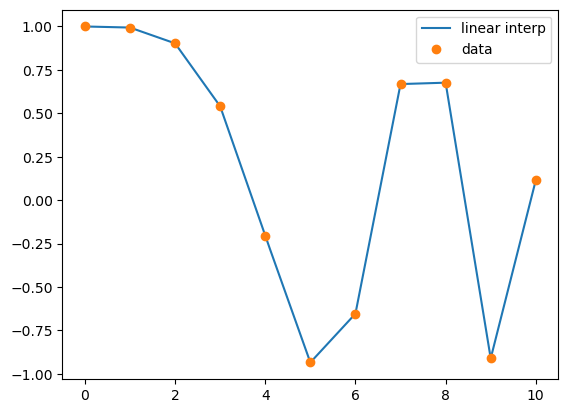

In [ ]:
import matplotlib.pyplot as plt

plt.plot(xnew, ynew, '-', label='linear interp')

plt.plot(x, y, 'o', label='data')

plt.legend(loc='best')

plt.show()

#### Cubic splines

In [ ]:
from scipy.interpolate import CubicSpline

spl = CubicSpline([1, 2, 3, 4, 5, 6], [1, 4, 8, 16, 25, 36])

spl(2.5)

array(5.57083333)

In [ ]:
from scipy.interpolate import CubicSpline

x = np.linspace(0, 10, num=11)

y = np.cos(-x**2 / 9.)

spl = CubicSpline(x, y)


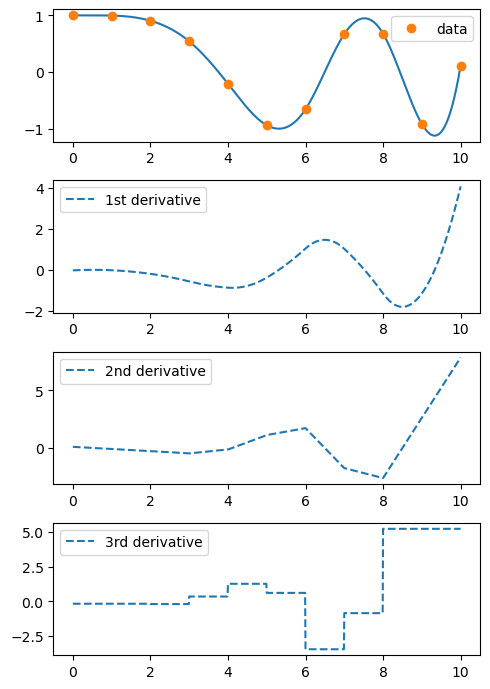

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 1, figsize=(5, 7))

xnew = np.linspace(0, 10, num=1001)

ax[0].plot(xnew, spl(xnew))

ax[0].plot(x, y, 'o', label='data')

ax[1].plot(xnew, spl(xnew, nu=1), '--', label='1st derivative')

ax[2].plot(xnew, spl(xnew, nu=2), '--', label='2nd derivative')

ax[3].plot(xnew, spl(xnew, nu=3), '--', label='3rd derivative')

for j in range(4):

    ax[j].legend(loc='best')

plt.tight_layout()

plt.show()


#### Monotone interpolants 

In [ ]:
from scipy.interpolate import CubicSpline, PchipInterpolator, Akima1DInterpolator

x = np.array([1., 2., 3., 4., 4.5, 5., 6., 7., 8])

y = x**2

y[4] += 101

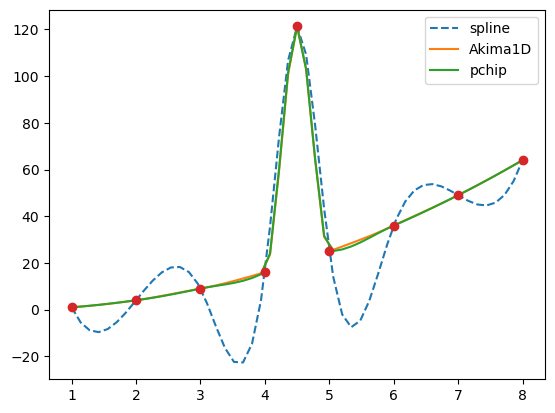

In [ ]:
import matplotlib.pyplot as plt

xx = np.linspace(1, 8, 51)

plt.plot(xx, CubicSpline(x, y)(xx), '--', label='spline')

plt.plot(xx, Akima1DInterpolator(x, y)(xx), '-', label='Akima1D')

plt.plot(xx, PchipInterpolator(x, y)(xx), '-', label='pchip')

plt.plot(x, y, 'o')

plt.legend()

plt.show()

#### Interpolation with B-splines

In [ ]:
x = np.linspace(0, 3/2, 7)

y = np.sin(np.pi*x)

In [ ]:
from scipy.interpolate import make_interp_spline

bspl = make_interp_spline(x, y, k=3)

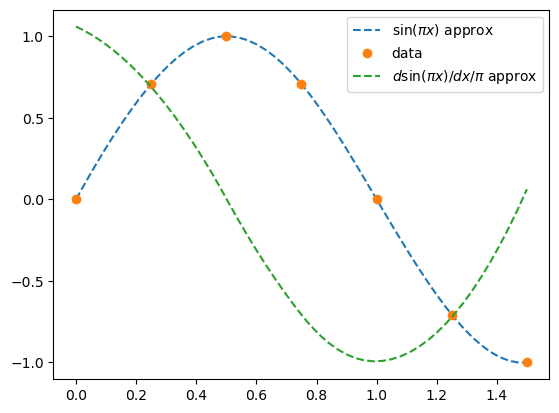

In [ ]:
der = bspl.derivative()      # a BSpline representing the derivative

import matplotlib.pyplot as plt

xx = np.linspace(0, 3/2, 51)

plt.plot(xx, bspl(xx), '--', label=r'$\sin(\pi x)$ approx')

plt.plot(x, y, 'o', label='data')

plt.plot(xx, der(xx)/np.pi, '--', label='$d \sin(\pi x)/dx / \pi$ approx')

plt.legend()

plt.show()

In [ ]:
bspl.k, der.k

(3, 2)

#### Parametric spline curves

In [ ]:
x = [0, 1, 2, 3, 4, 5, 6]

y = [0, 0, 0, 9, 0, 0, 0]

p = np.stack((x, y))

p

array([[0, 1, 2, 3, 4, 5, 6],
       [0, 0, 0, 9, 0, 0, 0]])

In [ ]:
u_unif = x

In [ ]:
dp = p[:, 1:] - p[:, :-1]      # 2-vector distances between points

l = (dp**2).sum(axis=0)        # squares of lengths of 2-vectors between points

u_cord = np.sqrt(l).cumsum()   # cumulative sums of 2-norms

u_cord = np.r_[0, u_cord]      # the first point is parameterized at zero

In [ ]:
u_c = np.r_[0, np.cumsum((dp**2).sum(axis=0)**0.25)]

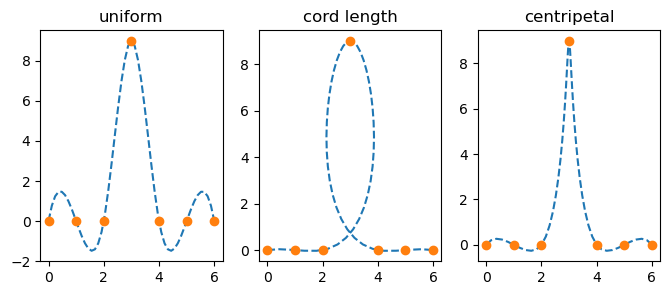

In [ ]:
from scipy.interpolate import make_interp_spline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(8, 3))

parametrizations = ['uniform', 'cord length', 'centripetal']


for j, u in enumerate([u_unif, u_cord, u_c]):
    spl = make_interp_spline(u, p, axis=1)    # note p is a 2D array
    uu = np.linspace(u[0], u[-1], 51)
    xx, yy = spl(uu)
    ax[j].plot(xx, yy, '--')
    ax[j].plot(p[0, :], p[1, :], 'o')
    ax[j].set_title(parametrizations[j])

plt.show()


### Piecewise polynomials Manipulating PPoly objectsand splines

#### Manipulating PPoly objects

In [ ]:
from scipy.interpolate import CubicSpline

x = np.linspace(0, 10, 71)

y = np.sin(x)

spl = CubicSpline(x, y)



In [ ]:
dspl = spl.derivative()

In [ ]:
dspl(1.1), spl(1.1, nu=1)

(array(0.45361436), array(0.45361436))

In [ ]:
dspl.roots() / np.pi

array([-0.45480801,  0.50000034,  1.50000099,  2.5000016 ,  3.46249993])

In [ ]:
dspl.roots(extrapolate=False) / np.pi

array([0.50000034, 1.50000099, 2.5000016 ])

In [ ]:
dspl.solve(0.5, extrapolate=False) / np.pi

array([0.33332755, 1.66667195, 2.3333271 ])

In [ ]:
from scipy.special import ellipk

m = 0.5

ellipk(m)

1.8540746773013719

In [ ]:
from scipy.interpolate import PchipInterpolator

x = np.linspace(0, np.pi/2, 70)

y = (1 - m*np.sin(x)**2)**(-1/2)

spl = PchipInterpolator(x, y)

In [ ]:
spl.integrate(0, np.pi/2)

array(1.85407467)

In [ ]:
from scipy.interpolate import PchipInterpolator

m = np.linspace(0, 0.9, 11)

x = np.linspace(0, np.pi/2, 70)

y = 1 / np.sqrt(1 - m[:, None]*np.sin(x)**2)

[<matplotlib.lines.Line2D>]

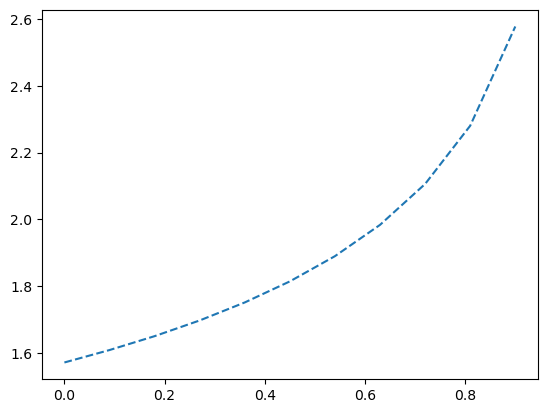

In [ ]:
spl = PchipInterpolator(x, y, axis=1)  # the default is axis=0

import matplotlib.pyplot as plt

plt.plot(m, spl.integrate(0, np.pi/2), '--')

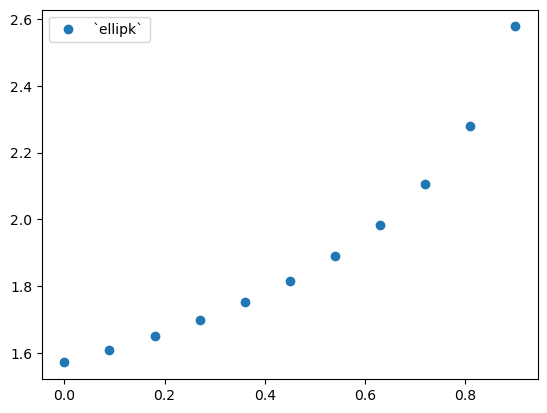

In [ ]:
from scipy.special import ellipk

plt.plot(m, ellipk(m), 'o')

plt.legend(['`ellipk`', 'integrated piecewise polynomial'])

plt.show()


#### B-splines: knots and coefficients

In [ ]:
x = np.linspace(0, 3/2, 7)

y = np.sin(np.pi*x)

from scipy.interpolate import make_interp_spline

bspl = make_interp_spline(x, y, k=3)

print(bspl.t)

[0.   0.   0.   0.   0.5  0.75 1.   1.5  1.5  1.5  1.5 ]


In [ ]:
print(x)

[0.   0.25 0.5  0.75 1.   1.25 1.5 ]


In [ ]:
len(bspl.c)

7

In [ ]:
k = 3      # cubic splines

t = [0., 1.4, 2., 3.1, 5.]   # internal knots

t = np.r_[[0]*k, t, [5]*k]   # add boundary knots

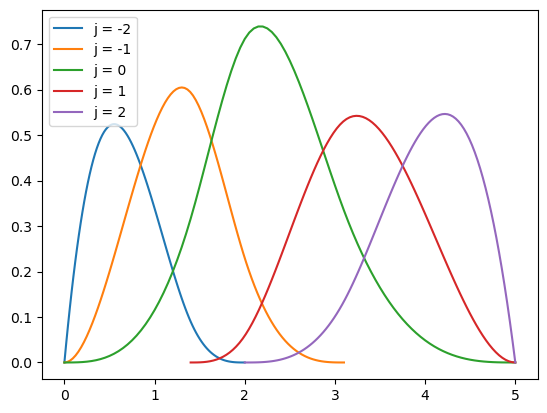

In [ ]:
from scipy.interpolate import BSpline

import matplotlib.pyplot as plt

for j in [-2, -1, 0, 1, 2]:

    a, b = t[k+j], t[-k+j-1]

    xx = np.linspace(a, b, 101)

    bspl = BSpline.basis_element(t[k+j:-k+j])

    plt.plot(xx, bspl(xx), label=f'j = {j}')

plt.legend(loc='best')

plt.show()

In [ ]:
c = np.zeros(t.size - k - 1)

c[-2] = 1

b = BSpline(t, c, k)

np.allclose(b(xx), bspl(xx))

True

In [ ]:
t = [0., 0., 0., 0., 2., 3., 4., 6., 6., 6., 6.]

In [ ]:
xnew = [1, 2, 3]


In [ ]:
from scipy.interpolate import BSpline

mat = BSpline.design_matrix(xnew, t, k=3)

mat

<3x7 sparse array of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [ ]:
with np.printoptions(precision=3):

    print(mat.toarray())

[[0.125 0.514 0.319 0.042 0.    0.    0.   ]
 [0.    0.111 0.556 0.333 0.    0.    0.   ]
 [0.    0.    0.125 0.75  0.125 0.    0.   ]]


### Smoothing splines

#### Spline smoothing in 1-D

In [ ]:
import numpy as np

from scipy.interpolate import splrep, BSpline

In [ ]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/16)

rng = np.random.default_rng()

y =  np.sin(x) + 0.4*rng.standard_normal(size=len(x))

In [ ]:
tck = splrep(x, y, s=0)

tck_s = splrep(x, y, s=len(x))

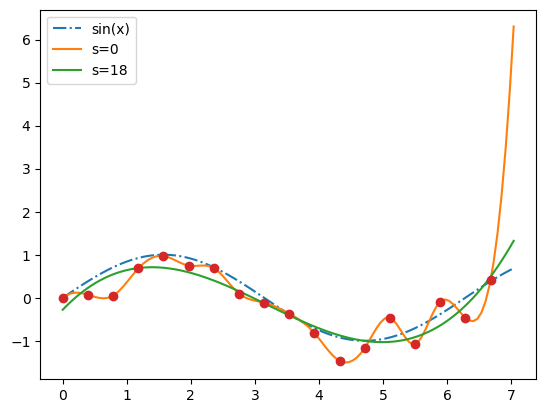

In [ ]:
import matplotlib.pyplot as plt

xnew = np.arange(0, 9/4, 1/50) * np.pi

plt.plot(xnew, np.sin(xnew), '-.', label='sin(x)')

plt.plot(xnew, BSpline(*tck)(xnew), '-', label='s=0')

plt.plot(xnew, BSpline(*tck_s)(xnew), '-', label=f's={len(x)}')

plt.plot(x, y, 'o')

plt.legend()

plt.show()

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from scipy import interpolate

In [ ]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)

y = np.sin(x)

tck = interpolate.splrep(x, y, s=0)

xnew = np.arange(0, 2*np.pi, np.pi/50)

ynew = interpolate.splev(xnew, tck, der=0)

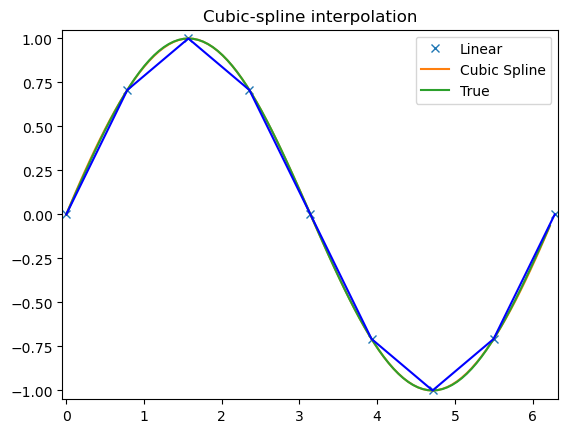

In [ ]:
plt.figure()

plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')

plt.legend(['Linear', 'Cubic Spline', 'True'])

plt.axis([-0.05, 6.33, -1.05, 1.05])

plt.title('Cubic-spline interpolation')

plt.show()


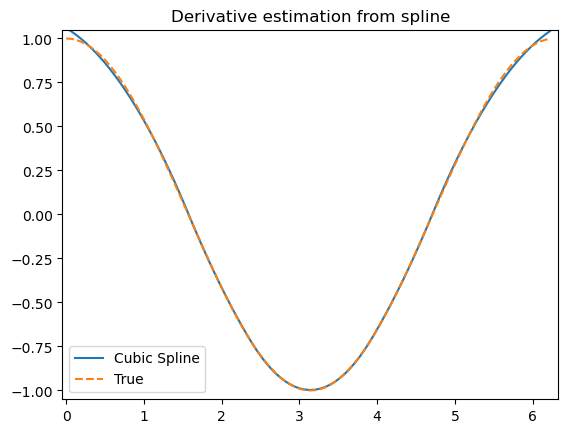

In [ ]:
yder = interpolate.splev(xnew, tck, der=1)   # or BSpline(*tck)(xnew, 1)

plt.figure()

plt.plot(xnew, yder, xnew, np.cos(xnew),'--')

plt.legend(['Cubic Spline', 'True'])

plt.axis([-0.05, 6.33, -1.05, 1.05])

plt.title('Derivative estimation from spline')

plt.show()

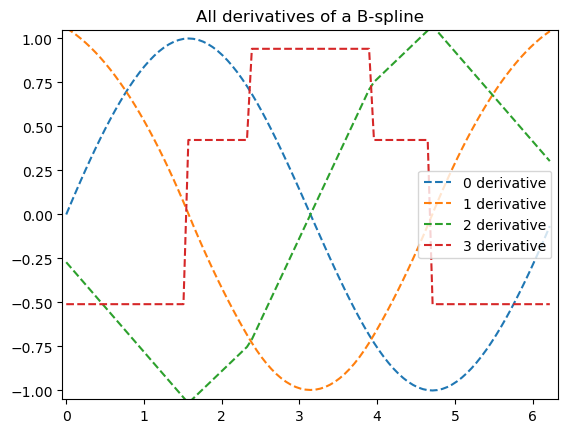

In [ ]:
yders = interpolate.spalde(xnew, tck)

plt.figure()

for i in range(len(yders[0])):

   plt.plot(xnew, [d[i] for d in yders], '--', label=f"{i} derivative")

plt.legend()

plt.axis([-0.05, 6.33, -1.05, 1.05])

plt.title('All derivatives of a B-spline')

plt.show()

In [ ]:
def integ(x, tck, constant=-1):

    x = np.atleast_1d(x)

    out = np.zeros(x.shape, dtype=x.dtype)

    for n in range(len(out)):

        out[n] = interpolate.splint(0, x[n], tck)

    out += constant

    return out


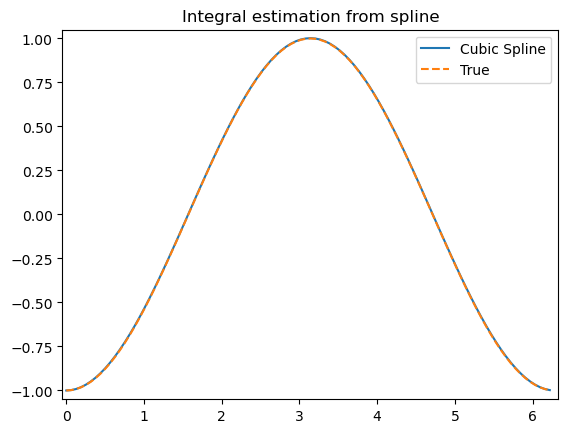

In [ ]:
yint = integ(xnew, tck)

plt.figure()

plt.plot(xnew, yint, xnew, -np.cos(xnew), '--')

plt.legend(['Cubic Spline', 'True'])

plt.axis([-0.05, 6.33, -1.05, 1.05])

plt.title('Integral estimation from spline')

plt.show()



In [ ]:
interpolate.sproot(tck)

array([3.14159265])

In [ ]:
x = np.linspace(-np.pi/4, 2.*np.pi + np.pi/4, 21)

y = np.sin(x)

tck = interpolate.splrep(x, y, s=0)

interpolate.sproot(tck)

array([-2.22044605e-16,  3.14159265e+00,  6.28318531e+00])

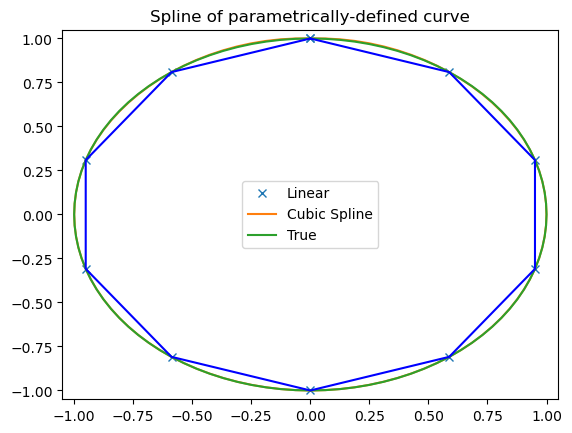

In [ ]:
t = np.arange(0, 1.1, .1)

x = np.sin(2*np.pi*t)

y = np.cos(2*np.pi*t)

tck, u = interpolate.splprep([x, y], s=0)

unew = np.arange(0, 1.01, 0.01)

out = interpolate.splev(unew, tck)

plt.figure()

plt.plot(x, y, 'x', out[0], out[1], np.sin(2*np.pi*unew), np.cos(2*np.pi*unew), x, y, 'b')

plt.legend(['Linear', 'Cubic Spline', 'True'])

plt.axis([-1.05, 1.05, -1.05, 1.05])

plt.title('Spline of parametrically-defined curve')

plt.show()


In [ ]:
tt, cc, k = tck

cc = np.array(cc)

bspl = BSpline(tt, cc.T, k)    # note the transpose

xy = bspl(u)

xx, yy = xy.T   # transpose to unpack into a pair of arrays

np.allclose(x, xx)

True

In [ ]:
np.allclose(y, yy)

True

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from scipy import interpolate

In [ ]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)

y = np.sin(x)

s = interpolate.InterpolatedUnivariateSpline(x, y)

xnew = np.arange(0, 2*np.pi, np.pi/50)

ynew = s(xnew)

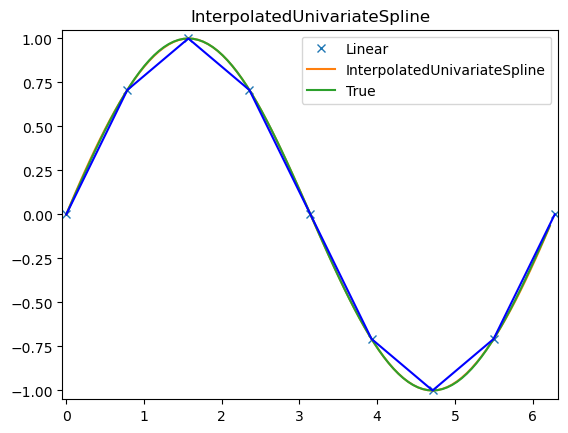

In [ ]:
plt.figure()

plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')

plt.legend(['Linear', 'InterpolatedUnivariateSpline', 'True'])

plt.axis([-0.05, 6.33, -1.05, 1.05])

plt.title('InterpolatedUnivariateSpline')

plt.show()


In [ ]:
t = [np.pi/2-.1, np.pi/2+.1, 3*np.pi/2-.1, 3*np.pi/2+.1]

s = interpolate.LSQUnivariateSpline(x, y, t, k=2)

ynew = s(xnew)


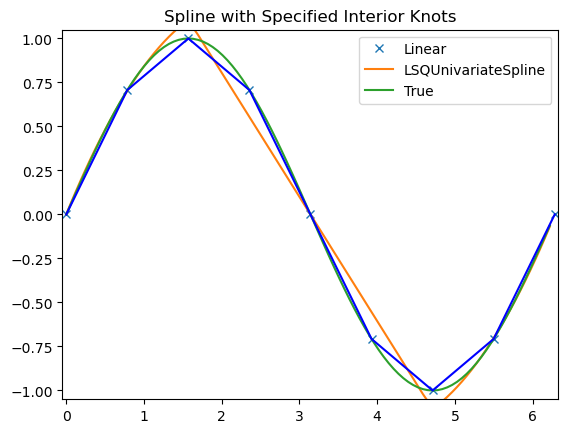

In [ ]:
plt.figure()

plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')

plt.legend(['Linear', 'LSQUnivariateSpline', 'True'])

plt.axis([-0.05, 6.33, -1.05, 1.05])

plt.title('Spline with Specified Interior Knots')

plt.show()

#### 2-D smoothing splines

In [ ]:
x_edges, y_edges = np.mgrid[-1:1:21j, -1:1:21j]

x = x_edges[:-1, :-1] + np.diff(x_edges[:2, 0])[0] / 2.

y = y_edges[:-1, :-1] + np.diff(y_edges[0, :2])[0] / 2.

z = (x+y) * np.exp(-6.0*(x*x+y*y))

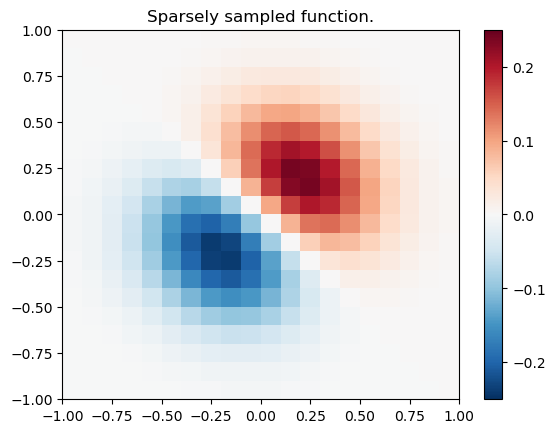

In [ ]:
plt.figure()

lims = dict(cmap='RdBu_r', vmin=-0.25, vmax=0.25)

plt.pcolormesh(x_edges, y_edges, z, shading='flat', **lims)

plt.colorbar()

plt.title("Sparsely sampled function.")

plt.show()

In [ ]:
xnew_edges, ynew_edges = np.mgrid[-1:1:71j, -1:1:71j]

xnew = xnew_edges[:-1, :-1] + np.diff(xnew_edges[:2, 0])[0] / 2.

ynew = ynew_edges[:-1, :-1] + np.diff(ynew_edges[0, :2])[0] / 2.

tck = interpolate.bisplrep(x, y, z, s=0)

znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

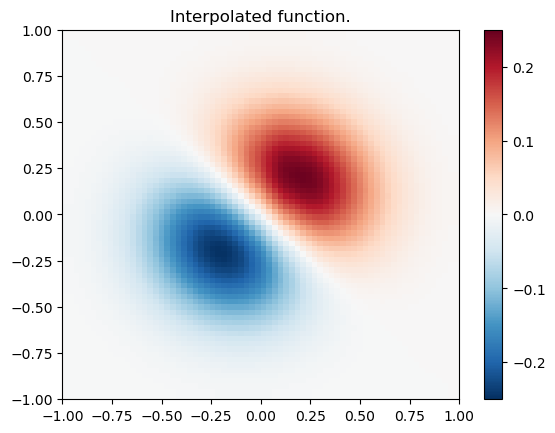

In [ ]:
plt.figure()

plt.pcolormesh(xnew_edges, ynew_edges, znew, shading='flat', **lims)

plt.colorbar()

plt.title("Interpolated function.")

plt.show()

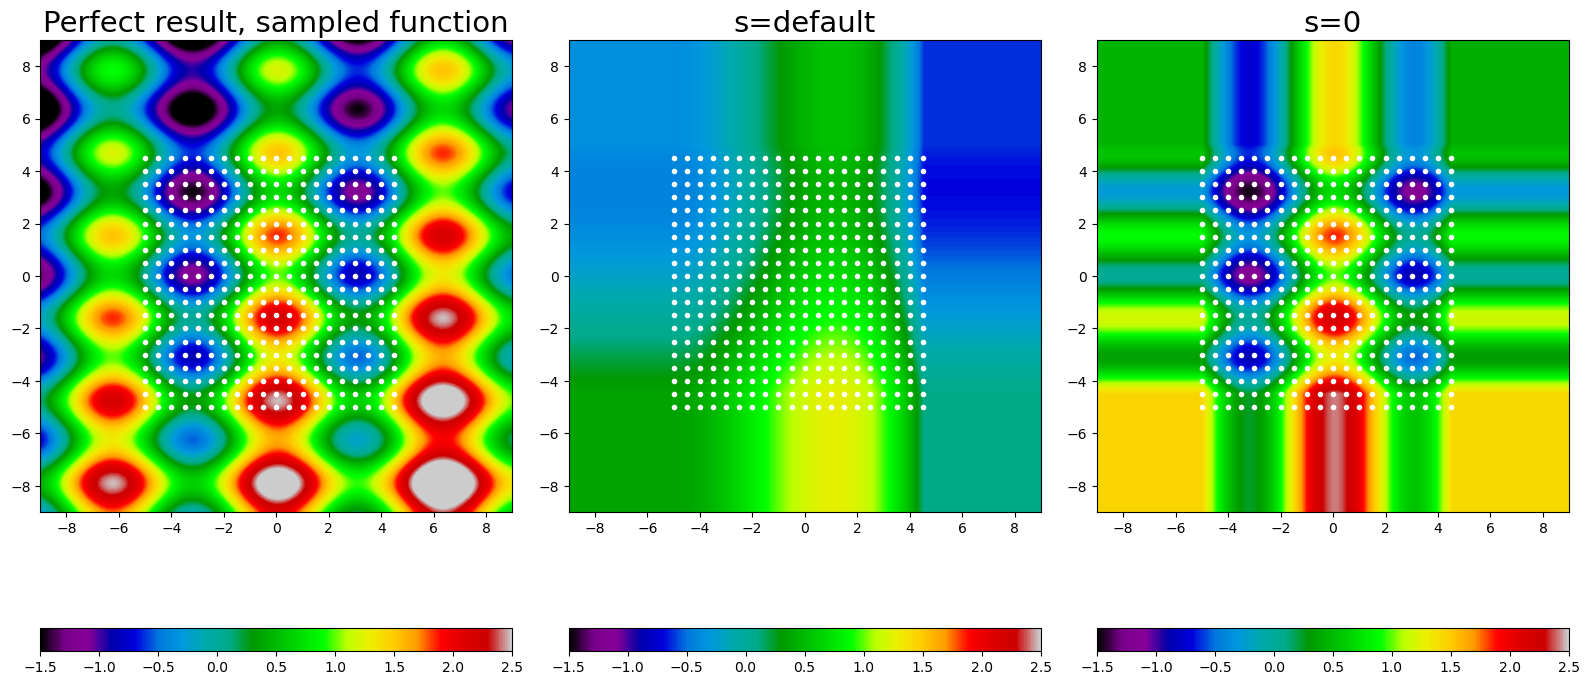

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import SmoothBivariateSpline

import warnings
warnings.simplefilter('ignore')

train_x, train_y = np.meshgrid(np.arange(-5, 5, 0.5), np.arange(-5, 5, 0.5))
train_x = train_x.flatten()
train_y = train_y.flatten()

def z_func(x, y):
    return np.cos(x) + np.sin(y) ** 2 + 0.05 * x + 0.1 * y

train_z = z_func(train_x, train_y)
interp_func = SmoothBivariateSpline(train_x, train_y, train_z, s=0.0)
smth_func = SmoothBivariateSpline(train_x, train_y, train_z)

test_x = np.arange(-9, 9, 0.01)
test_y = np.arange(-9, 9, 0.01)
grid_x, grid_y = np.meshgrid(test_x, test_y)

interp_result = interp_func(test_x, test_y).T
smth_result = smth_func(test_x, test_y).T
perfect_result = z_func(grid_x, grid_y)

fig, axes = plt.subplots(1, 3, figsize=(16, 8))
extent = [test_x[0], test_x[-1], test_y[0], test_y[-1]]
opts = dict(aspect='equal', cmap='nipy_spectral', extent=extent, vmin=-1.5, vmax=2.5)

im = axes[0].imshow(perfect_result, **opts)
fig.colorbar(im, ax=axes[0], orientation='horizontal')
axes[0].plot(train_x, train_y, 'w.')
axes[0].set_title('Perfect result, sampled function', fontsize=21)

im = axes[1].imshow(smth_result, **opts)
axes[1].plot(train_x, train_y, 'w.')
fig.colorbar(im, ax=axes[1], orientation='horizontal')
axes[1].set_title('s=default', fontsize=21)

im = axes[2].imshow(interp_result, **opts)
fig.colorbar(im, ax=axes[2], orientation='horizontal')
axes[2].plot(train_x, train_y, 'w.')
axes[2].set_title('s=0', fontsize=21)

plt.tight_layout()
plt.show()

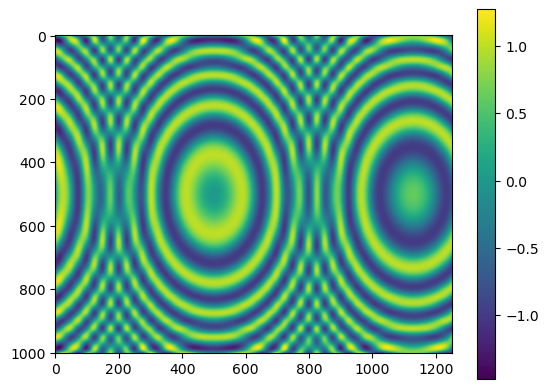

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

x = np.arange(-5.01, 5.01, 0.25)        # the grid is an outer product
y = np.arange(-5.01, 7.51, 0.25)        # of x and y arrays

xx, yy = np.meshgrid(x, y, indexing='ij')
z = np.sin(xx**2 + 2.*yy**2)            # z array needs to be 2-D

func = RectBivariateSpline(x, y, z, s=0)

xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 7.51, 1e-2)
znew = func(xnew, ynew)

plt.imshow(znew)
plt.colorbar()
plt.show()

### Multivariate data interpolation on a regular grid (RegularGridInterpolator)

In [ ]:
import matplotlib.pyplot as plt

from scipy.interpolate import RegularGridInterpolator

In [ ]:
def F(u, v):

    return u * np.cos(u * v) + v * np.sin(u * v)

In [ ]:
fit_points = [np.linspace(0, 3, 8), np.linspace(0, 3, 11)]

values = F(*np.meshgrid(*fit_points, indexing='ij'))


In [ ]:
ut, vt = np.meshgrid(np.linspace(0, 3, 80), np.linspace(0, 3, 80), indexing='ij')

true_values = F(ut, vt)

test_points = np.array([ut.ravel(), vt.ravel()]).T

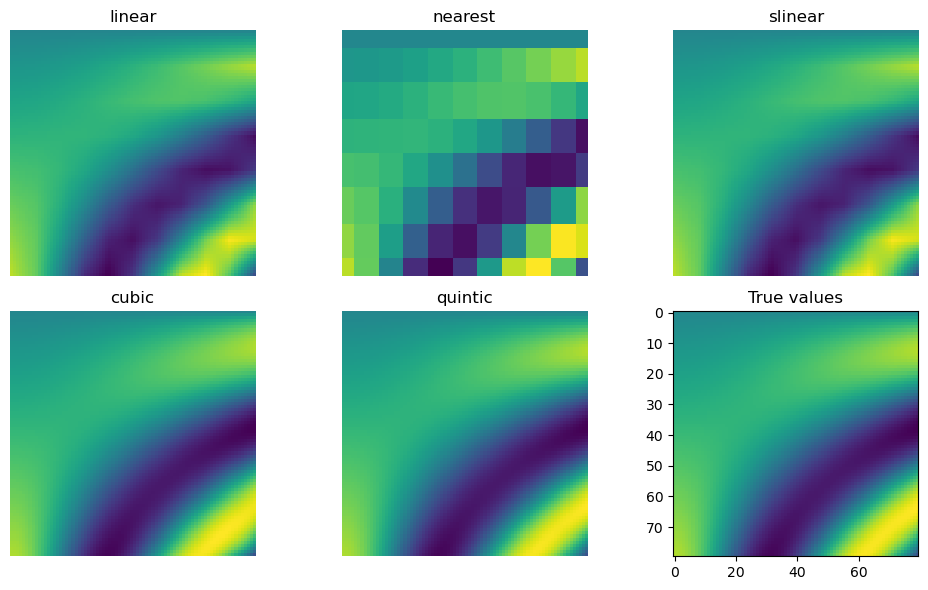

In [ ]:
interp = RegularGridInterpolator(fit_points, values)

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

axes = axes.ravel()

fig_index = 0

for method in ['linear', 'nearest', 'slinear', 'cubic', 'quintic']:

    im = interp(test_points, method=method).reshape(80, 80)

    axes[fig_index].imshow(im)

    axes[fig_index].set_title(method)

    axes[fig_index].axis("off")

    fig_index += 1

axes[fig_index].imshow(true_values)

axes[fig_index].set_title("True values")

fig.tight_layout()

fig.show()

In [ ]:
from scipy.interpolate import interpn

rgi = RegularGridInterpolator(fit_points, values)

result_rgi = rgi(test_points)

In [ ]:
result_interpn = interpn(fit_points, values, test_points)

np.allclose(result_rgi, result_interpn, atol=1e-15)

True

In [ ]:
x = np.array([0, 5, 10])

y = np.array([0])

data = np.array([[0], [5], [10]])

rgi = RegularGridInterpolator((x, y), data,

                              bounds_error=False, fill_value=None)

rgi([(2, 0), (2, 1), (2, -1)])

array([2., 2., 2.])

In [ ]:
rgi.fill_value = -101

rgi([(2, 0), (2, 1), (2, -1)])

array([   2., -101., -101.])

In [ ]:
class CartesianGridInterpolator:
    def __init__(self, points, values, method='linear'):
        self.limits = np.array([[min(x), max(x)] for x in points])
        self.values = np.asarray(values, dtype=float)
        self.order = {'linear': 1, 'cubic': 3, 'quintic': 5}[method]

    def __call__(self, xi):
        """
        `xi` here is an array-like (an array or a list) of points.

        Each "point" is an ndim-dimensional array_like, representing
        the coordinates of a point in ndim-dimensional space.
        """
        # transpose the xi array into the ``map_coordinates`` convention
        # which takes coordinates of a point along columns of a 2D array.
        xi = np.asarray(xi).T

        # convert from data coordinates to pixel coordinates
        ns = self.values.shape
        coords = [(n-1)*(val - lo) / (hi - lo)
                  for val, n, (lo, hi) in zip(xi, ns, self.limits)]

        # interpolate
        return map_coordinates(self.values, coords,
                               order=self.order,
                               cval=np.nan)  # fill_value

In [ ]:
x, y = np.arange(5), np.arange(6)

xx, yy = np.meshgrid(x, y, indexing='ij')

values = xx**3 + yy**3

rgi = RegularGridInterpolator((x, y), values, method='linear')

rgi([[1.5, 1.5], [3.5, 2.6]])

array([ 9. , 64.9])

In [ ]:
cgi = CartesianGridInterpolator((x, y), values, method='linear')

### Scattered data interpolation (griddata)

In [ ]:
def func(x, y):

    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [ ]:
grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 100),

                             np.linspace(0, 1, 200), indexing='ij')


In [ ]:
rng = np.random.default_rng()

points = rng.random((1000, 2))

values = func(points[:,0], points[:,1])


In [ ]:
from scipy.interpolate import griddata

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')

grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')

grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')


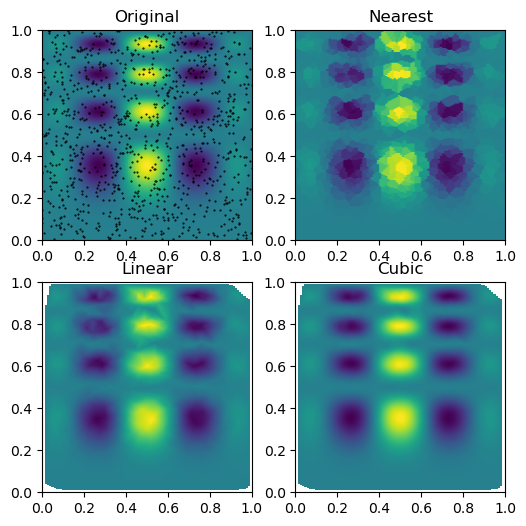

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(221)

plt.imshow(func(grid_x, grid_y).T, extent=(0, 1, 0, 1), origin='lower')

plt.plot(points[:, 0], points[:, 1], 'k.', ms=1)   # data

plt.title('Original')

plt.subplot(222)

plt.imshow(grid_z0.T, extent=(0, 1, 0, 1), origin='lower')

plt.title('Nearest')

plt.subplot(223)

plt.imshow(grid_z1.T, extent=(0, 1, 0, 1), origin='lower')

plt.title('Linear')

plt.subplot(224)

plt.imshow(grid_z2.T, extent=(0, 1, 0, 1), origin='lower')

plt.title('Cubic')

plt.gcf().set_size_inches(6, 6)

plt.show()

#### Using radial basis functions for smoothing/interpolation

In [ ]:
import numpy as np

from scipy.interpolate import RBFInterpolator, InterpolatedUnivariateSpline

import matplotlib.pyplot as plt

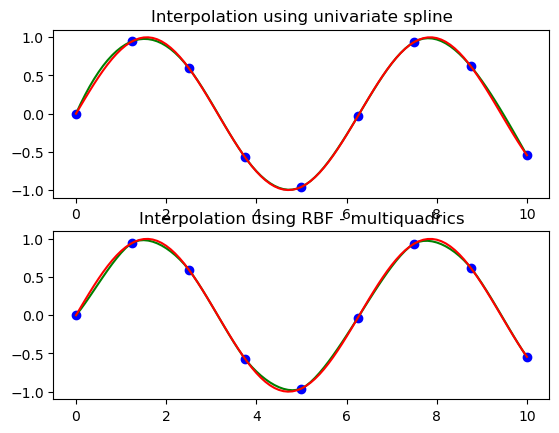

In [ ]:
# setup data

x = np.linspace(0, 10, 9).reshape(-1, 1)

y = np.sin(x)

xi = np.linspace(0, 10, 101).reshape(-1, 1)

# use fitpack2 method

ius = InterpolatedUnivariateSpline(x, y)

yi = ius(xi)

plt.subplot(2, 1, 1)

plt.plot(x, y, 'bo')

plt.plot(xi, yi, 'g')

plt.plot(xi, np.sin(xi), 'r')

plt.title('Interpolation using univariate spline')

# use RBF method

rbf = RBFInterpolator(x, y)

fi = rbf(xi)

plt.subplot(2, 1, 2)

plt.plot(x, y, 'bo')

plt.plot(xi, fi, 'g')

plt.plot(xi, np.sin(xi), 'r')

plt.title('Interpolation using RBF - multiquadrics')

plt.show()


<matplotlib.colorbar.Colorbar>

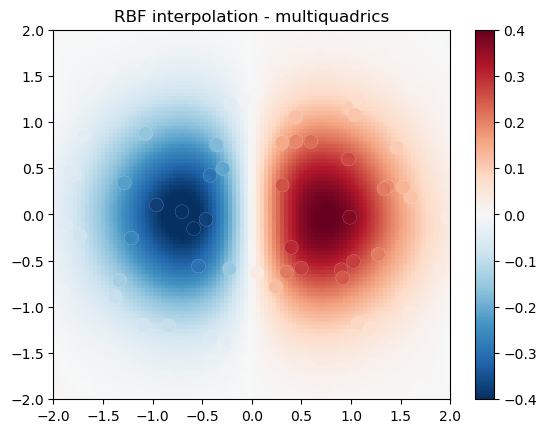

In [ ]:
import numpy as np

from scipy.interpolate import RBFInterpolator

import matplotlib.pyplot as plt

# 2-d tests - setup scattered data

rng = np.random.default_rng()

xy = rng.random((100, 2))*4.0-2.0

z = xy[:, 0]*np.exp(-xy[:, 0]**2-xy[:, 1]**2)

edges = np.linspace(-2.0, 2.0, 101)

centers = edges[:-1] + np.diff(edges[:2])[0] / 2.

x_i, y_i = np.meshgrid(centers, centers)

x_i = x_i.reshape(-1, 1)

y_i = y_i.reshape(-1, 1)

xy_i = np.concatenate([x_i, y_i], axis=1)

# use RBF

rbf = RBFInterpolator(xy, z, epsilon=2)

z_i = rbf(xy_i)

# plot the result

fig, ax = plt.subplots()

X_edges, Y_edges = np.meshgrid(edges, edges)

lims = dict(cmap='RdBu_r', vmin=-0.4, vmax=0.4)

mapping = ax.pcolormesh(

    X_edges, Y_edges, z_i.reshape(100, 100),

    shading='flat', **lims

)

ax.scatter(xy[:, 0], xy[:, 1], 100, z, edgecolor='w', lw=0.1, **lims)

ax.set(

    title='RBF interpolation - multiquadrics',

    xlim=(-2, 2),

    ylim=(-2, 2),

)

fig.colorbar(mapping)


### Extrapolation tips and tricks

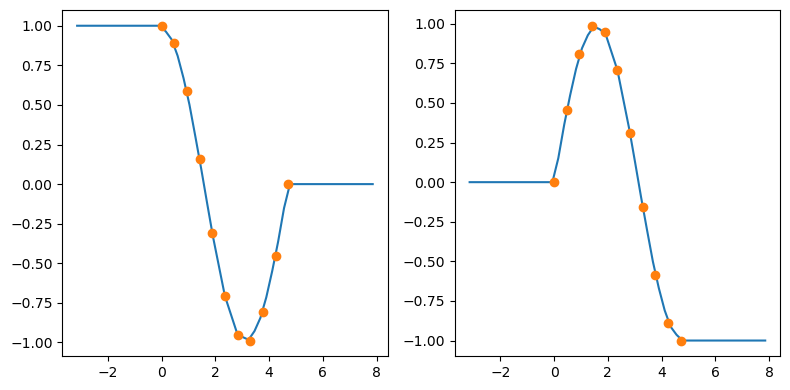

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x = np.linspace(0, 1.5*np.pi, 11)
y = np.column_stack((np.cos(x), np.sin(x)))   # y.shape is (11, 2)

func = interp1d(x, y,
                axis=0,  # interpolate along columns
                bounds_error=False,
                kind='linear',
                fill_value=(y[0], y[-1]))
xnew = np.linspace(-np.pi, 2.5*np.pi, 51)
ynew = func(xnew)

fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.plot(xnew, ynew[:, 0])
ax1.plot(x, y[:, 0], 'o')

ax2.plot(xnew, ynew[:, 1])
ax2.plot(x, y[:, 1], 'o')
plt.tight_layout()

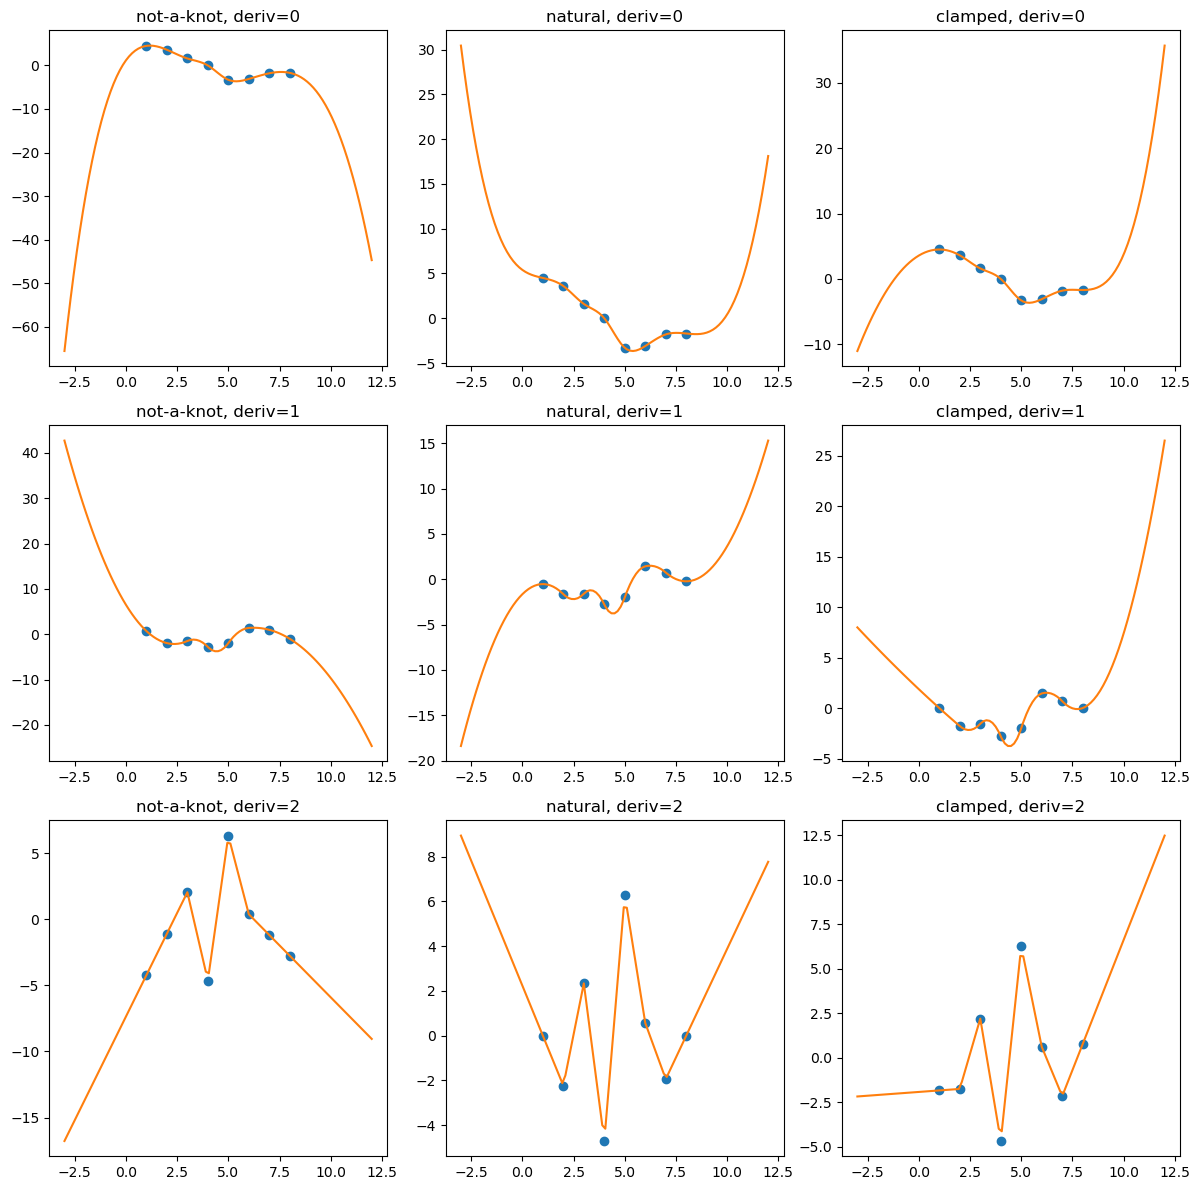

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

xs = [1, 2, 3, 4, 5, 6, 7, 8]
ys = [4.5, 3.6, 1.6, 0.0, -3.3, -3.1, -1.8, -1.7]

notaknot = CubicSpline(xs, ys, bc_type='not-a-knot')
natural = CubicSpline(xs, ys, bc_type='natural')
clamped = CubicSpline(xs, ys, bc_type='clamped')
xnew = np.linspace(min(xs) - 4, max(xs) + 4, 101)

splines = [notaknot, natural, clamped]
titles = ['not-a-knot', 'natural', 'clamped']

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i in [0, 1, 2]:
    for j, spline, title in zip(range(3), splines, titles):
        axs[i, j].plot(xs, spline(xs, nu=i),'o')
        axs[i, j].plot(xnew, spline(xnew, nu=i),'-')
        axs[i, j].set_title(f'{title}, deriv={i}')

plt.tight_layout()
plt.show()

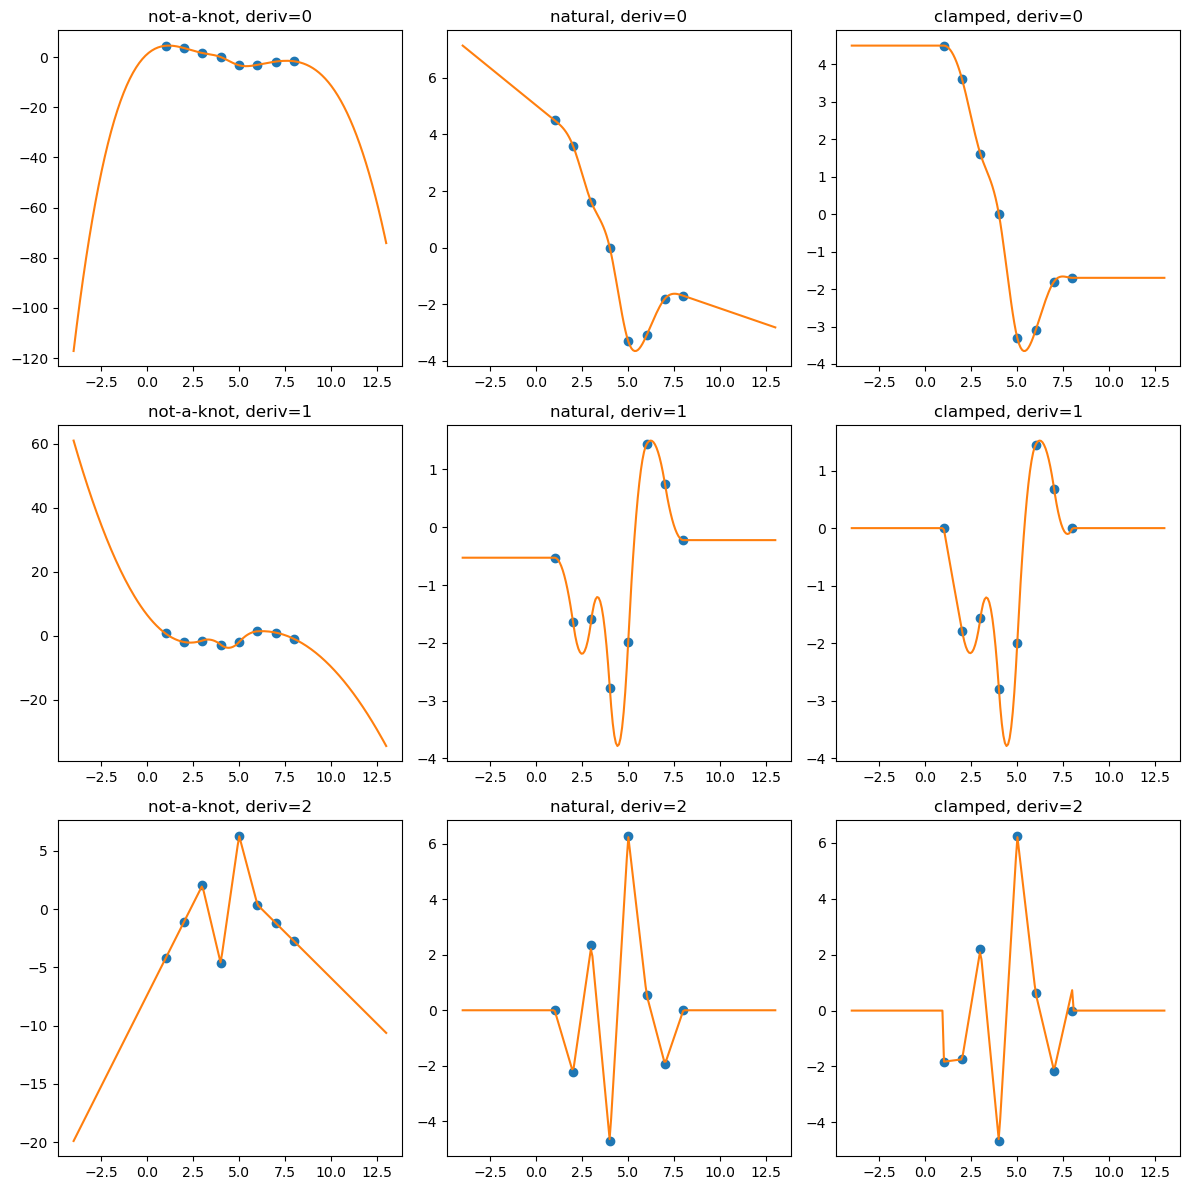

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def add_boundary_knots(spline):
    """
    Add knots infinitesimally to the left and right.

    Additional intervals are added to have zero 2nd and 3rd derivatives,
    and to maintain the first derivative from whatever boundary condition
    was selected. The spline is modified in place.
    """
    # determine the slope at the left edge
    leftx = spline.x[0]
    lefty = spline(leftx)
    leftslope = spline(leftx, nu=1)

    # add a new breakpoint just to the left and use the
    # known slope to construct the PPoly coefficients.
    leftxnext = np.nextafter(leftx, leftx - 1)
    leftynext = lefty + leftslope*(leftxnext - leftx)
    leftcoeffs = np.array([0, 0, leftslope, leftynext])
    spline.extend(leftcoeffs[..., None], np.r_[leftxnext])

    # repeat with additional knots to the right
    rightx = spline.x[-1]
    righty = spline(rightx)
    rightslope = spline(rightx,nu=1)
    rightxnext = np.nextafter(rightx, rightx + 1)
    rightynext = righty + rightslope * (rightxnext - rightx)
    rightcoeffs = np.array([0, 0, rightslope, rightynext])
    spline.extend(rightcoeffs[..., None], np.r_[rightxnext])

xs = [1, 2, 3, 4, 5, 6, 7, 8]
ys = [4.5, 3.6, 1.6, 0.0, -3.3, -3.1, -1.8, -1.7]

notaknot = CubicSpline(xs,ys, bc_type='not-a-knot')
# not-a-knot does not require additional intervals

natural = CubicSpline(xs,ys, bc_type='natural')
# extend the natural natural spline with linear extrapolating knots
add_boundary_knots(natural)

clamped = CubicSpline(xs,ys, bc_type='clamped')
# extend the clamped spline with constant extrapolating knots
add_boundary_knots(clamped)

xnew = np.linspace(min(xs) - 5, max(xs) + 5, 201)

fig, axs = plt.subplots(3, 3,figsize=(12,12))

splines = [notaknot, natural, clamped]
titles = ['not-a-knot', 'natural', 'clamped']

for i in [0, 1, 2]:
    for j, spline, title in zip(range(3), splines, titles):
        axs[i, j].plot(xs, spline(xs, nu=i),'o')
        axs[i, j].plot(xnew, spline(xnew, nu=i),'-')
        axs[i, j].set_title(f'{title}, deriv={i}')

plt.tight_layout()
plt.show()

#### Manually implement the asymptotics

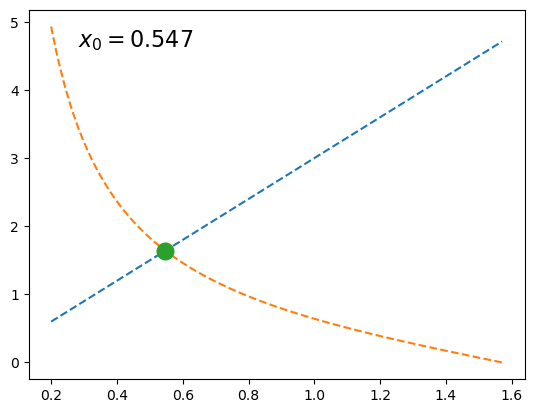

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

def f(x, a):
    return a*x - 1/np.tan(x)

a = 3
x0 = brentq(f, 1e-16, np.pi/2, args=(a,))   # here we shift the left edge
                                            # by a machine epsilon to avoid
                                            # a division by zero at x=0
xx = np.linspace(0.2, np.pi/2, 101)
plt.plot(xx, a*xx, '--')
plt.plot(xx, 1/np.tan(xx), '--')
plt.plot(x0, a*x0, 'o', ms=12)
plt.text(0.1, 0.9, fr'$x_0 = {x0:.3f}$',
               transform=plt.gca().transAxes, fontsize=16)
plt.show()

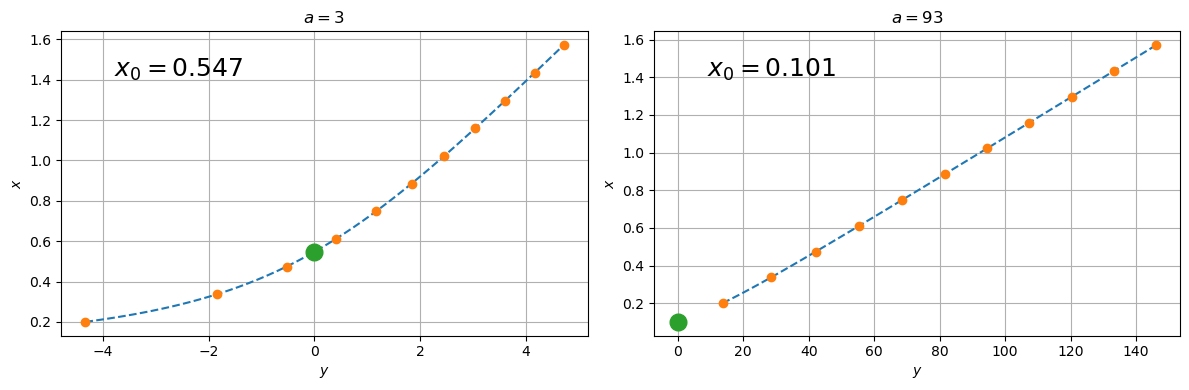

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BPoly

def f(x, a):
    return a*x - 1/np.tan(x)

xleft, xright = 0.2, np.pi/2
x = np.linspace(xleft, xright, 11)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for j, a in enumerate([3, 93]):
    y = f(x, a)
    dydx = a + 1./np.sin(x)**2    # d(ax - 1/tan(x)) / dx
    dxdy = 1 / dydx               # dx/dy = 1 / (dy/dx)

    xdx = np.c_[x, dxdy]
    spl = BPoly.from_derivatives(y, xdx)   # inverse interpolation

    yy = np.linspace(f(xleft, a), f(xright, a), 51)
    ax[j].plot(yy, spl(yy), '--')
    ax[j].plot(y, x, 'o')
    ax[j].set_xlabel(r'$y$')
    ax[j].set_ylabel(r'$x$')
    ax[j].set_title(rf'$a = {a}$')

    ax[j].plot(0, spl(0), 'o', ms=12)
    ax[j].text(0.1, 0.85, fr'$x_0 = {spl(0):.3f}$',
               transform=ax[j].transAxes, fontsize=18)
    ax[j].grid(True)
plt.tight_layout()
plt.show()

In [ ]:
class RootWithAsymptotics:
    def __init__(self, a):
        # construct the interpolant
        xleft, xright = 0.2, np.pi/2
        x = np.linspace(xleft, xright, 11)

        y = f(x, a)
        dydx = a + 1./np.sin(x)**2    # d(ax - 1/tan(x)) / dx
        dxdy = 1 / dydx               # dx/dy = 1 / (dy/dx)

        # inverse interpolation
        self.spl = BPoly.from_derivatives(y, np.c_[x, dxdy])
        self.a = a

    def root(self):
        out = self.spl(0)
        asympt = 1./np.sqrt(self.a)
        return np.where(spl.x.min() < asympt, out, asympt)


In [ ]:
r = RootWithAsymptotics(93)

r.root()

array(0.10369517)

#### Extrapolation in D > 1

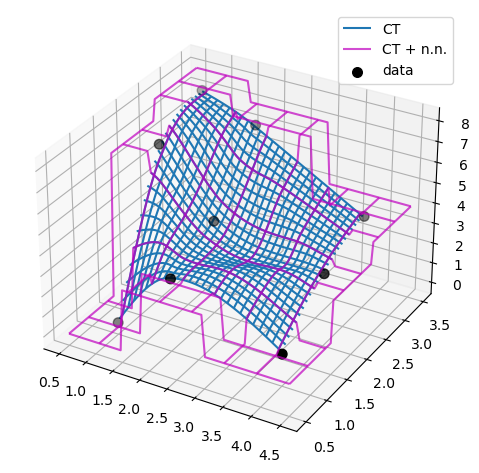

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CloughTocher2DInterpolator as CT

def my_CT(xy, z):
    """CT interpolator + nearest-neighbor extrapolation.

    Parameters
    ----------
    xy : ndarray, shape (npoints, ndim)
        Coordinates of data points
    z : ndarray, shape (npoints)
        Values at data points

    Returns
    -------
    func : callable
        A callable object which mirrors the CT behavior,
        with an additional neareast-neighbor extrapolation
        outside of the data range.
    """
    x = xy[:, 0]
    y = xy[:, 1]
    f = CT(xy, z)

    # this inner function will be returned to a user
    def new_f(xx, yy):
        # evaluate the CT interpolator. Out-of-bounds values are nan.
        zz = f(xx, yy)
        nans = np.isnan(zz)

        if nans.any():
            # for each nan point, find its nearest neighbor
            inds = np.argmin(
                (x[:, None] - xx[nans])**2 +
                (y[:, None] - yy[nans])**2
                , axis=0)
            # ... and use its value
            zz[nans] = z[inds]
        return zz

    return new_f

# Now illustrate the difference between the original ``CT`` interpolant
# and ``my_CT`` on a small example:

x = np.array([1, 1, 1, 2, 2, 2, 4, 4, 4])
y = np.array([1, 2, 3, 1, 2, 3, 1, 2, 3])
z = np.array([0, 7, 8, 3, 4, 7, 1, 3, 4])

xy = np.c_[x, y]
lut = CT(xy, z)
lut2 = my_CT(xy, z)

X = np.linspace(min(x) - 0.5, max(x) + 0.5, 71)
Y = np.linspace(min(y) - 0.5, max(y) + 0.5, 71)
X, Y = np.meshgrid(X, Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_wireframe(X, Y, lut(X, Y), label='CT')
ax.plot_wireframe(X, Y, lut2(X, Y), color='m',
                  cstride=10, rstride=10, alpha=0.7, label='CT + n.n.')

ax.scatter(x, y, z,  'o', color='k', s=48, label='data')
ax.legend()
plt.tight_layout()

## Fourier transforms 

### Fast Fourier transforms 

#### 1-D discrete Fourier transforms 

In [ ]:
from scipy.fft import fft, ifft

import numpy as np

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])

y = fft(x)

y

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [ ]:
yinv = ifft(y)

yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

In [ ]:
np.sum(x)

4.5

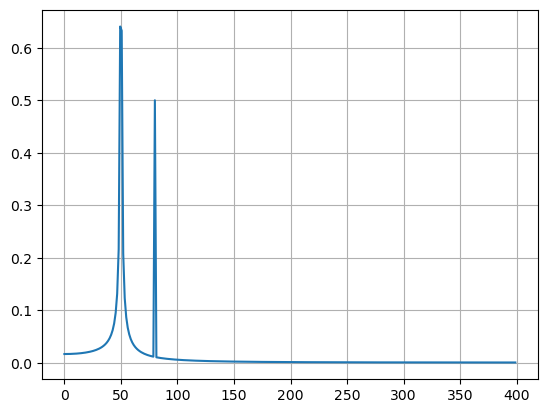

In [ ]:
from scipy.fft import fft, fftfreq

import numpy as np

# Number of sample points

N = 600

# sample spacing

T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N, endpoint=False)

y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

yf = fft(y)

xf = fftfreq(N, T)[:N//2]

import matplotlib.pyplot as plt

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

plt.grid()

plt.show()

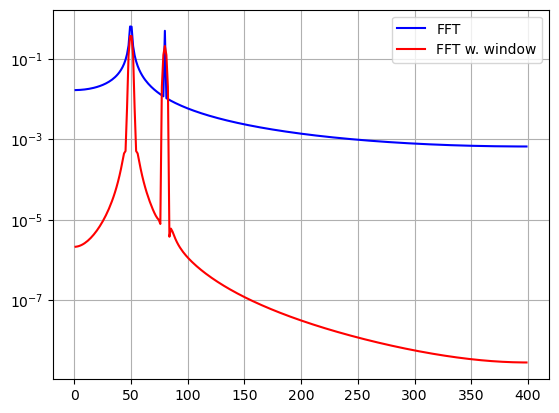

In [ ]:
from scipy.fft import fft, fftfreq

import numpy as np

# Number of sample points

N = 600

# sample spacing

T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N, endpoint=False)

y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

yf = fft(y)

from scipy.signal.windows import blackman

w = blackman(N)

ywf = fft(y*w)

xf = fftfreq(N, T)[:N//2]

import matplotlib.pyplot as plt

plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')

plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')

plt.legend(['FFT', 'FFT w. window'])

plt.grid()
from scipy.fft import fftshift

x = np.arange(8)

fftshift(x)
plt.show()

In [ ]:
from scipy.fft import fftfreq

freq = fftfreq(8, 0.125)

freq

array([ 0.,  1.,  2.,  3., -4., -3., -2., -1.])

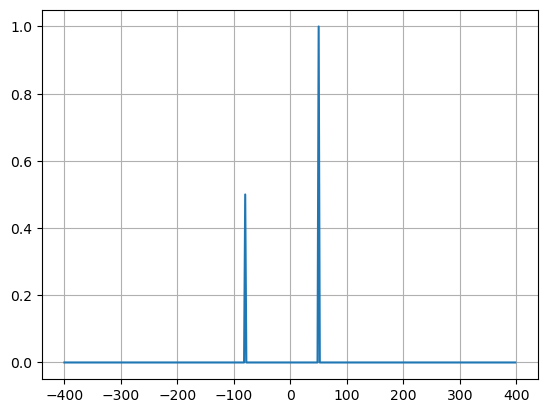

In [ ]:
from scipy.fft import fftshift

x = np.arange(8)

fftshift(x)

from scipy.fft import fft, fftfreq, fftshift

import numpy as np

# number of signal points

N = 400

# sample spacing

T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N, endpoint=False)

y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)

yf = fft(y)

xf = fftfreq(N, T)

xf = fftshift(xf)

yplot = fftshift(yf)

import matplotlib.pyplot as plt

plt.plot(xf, 1.0/N * np.abs(yplot))

plt.grid()

plt.show()

In [ ]:
from scipy.fft import fft, rfft, irfft

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5, 1.0])

fft(x)

array([ 5.5 -0.j        ,  2.25-0.4330127j , -2.75-1.29903811j,
        1.5 -0.j        , -2.75+1.29903811j,  2.25+0.4330127j ])

In [ ]:
yr = rfft(x)

yr

array([ 5.5 +0.j        ,  2.25-0.4330127j , -2.75-1.29903811j,
        1.5 +0.j        ])

In [ ]:
irfft(yr)

array([ 1. ,  2. ,  1. , -1. ,  1.5,  1. ])

In [ ]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])

fft(x)

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [ ]:
yr = rfft(x)

yr

array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j])

In [ ]:
irfft(yr)

array([ 1.70788987,  2.40843925, -0.37366961,  0.75734049])

In [ ]:
irfft(yr, n=len(x))

array([ 1. ,  2. ,  1. , -1. ,  1.5])

#### 2- and N-D discrete Fourier transforms

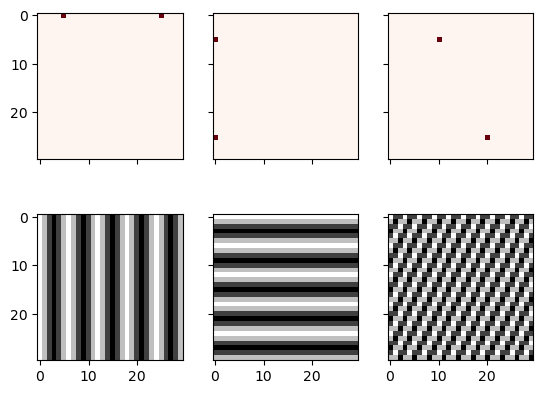

In [ ]:
from scipy.fft import ifftn

import matplotlib.pyplot as plt

import matplotlib.cm as cm

import numpy as np

N = 30

f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')

xf = np.zeros((N,N))

xf[0, 5] = 1

xf[0, N-5] = 1

Z = ifftn(xf)

ax1.imshow(xf, cmap=cm.Reds)

ax4.imshow(np.real(Z), cmap=cm.gray)

xf = np.zeros((N, N))

xf[5, 0] = 1

xf[N-5, 0] = 1

Z = ifftn(xf)

ax2.imshow(xf, cmap=cm.Reds)

ax5.imshow(np.real(Z), cmap=cm.gray)

xf = np.zeros((N, N))

xf[5, 10] = 1

xf[N-5, N-10] = 1

Z = ifftn(xf)

ax3.imshow(xf, cmap=cm.Reds)

ax6.imshow(np.real(Z), cmap=cm.gray)

plt.show()

### Discrete Cosine Transforms

#### DCT and IDCT

In [ ]:
from scipy.fft import dct, idct

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])

In [ ]:
dct(dct(x, type=2, norm='ortho'), type=3, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [ ]:
dct(dct(x, type=2), type=3)

array([ 10.,  20.,  10., -10.,  15.])

In [ ]:
# Normalized inverse: no scaling factor

idct(dct(x, type=2), type=2)

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [ ]:
dct(dct(x, type=1, norm='ortho'), type=1, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [ ]:
# Unnormalized round-trip via DCT-I: scaling factor 2*(N-1) = 8

dct(dct(x, type=1), type=1)

array([ 8., 16.,  8., -8., 12.])

In [ ]:
# Normalized inverse: no scaling factor

idct(dct(x, type=1), type=1)

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [ ]:
dct(dct(x, type=4, norm='ortho'), type=4, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [ ]:
# Unnormalized round-trip via DCT-IV: scaling factor 2*N = 10

dct(dct(x, type=4), type=4)

array([ 10.,  20.,  10., -10.,  15.])

In [ ]:
# Normalized inverse: no scaling factor

idct(dct(x, type=4), type=4)

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [ ]:
from scipy.fft import dct, idct

import matplotlib.pyplot as plt

N = 100

t = np.linspace(0,20,N, endpoint=False)

x = np.exp(-t/3)*np.cos(2*t)

y = dct(x, norm='ortho')

window = np.zeros(N)

window[:20] = 1

yr = idct(y*window, norm='ortho')

sum(abs(x-yr)**2) / sum(abs(x)**2)

0.0009872817275276098

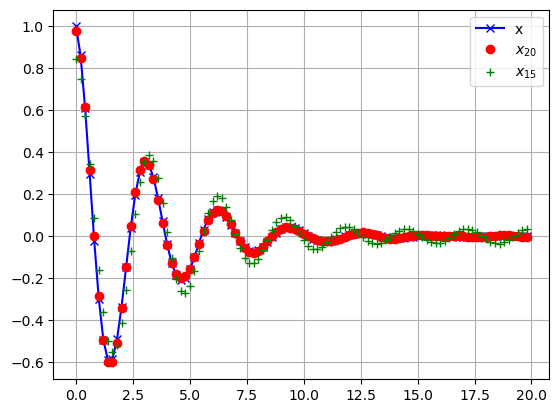

In [ ]:
plt.plot(t, x, '-bx')

plt.plot(t, yr, 'ro')

window = np.zeros(N)

window[:15] = 1

yr = idct(y*window, norm='ortho')

sum(abs(x-yr)**2) / sum(abs(x)**2)

plt.plot(t, yr, 'g+')

plt.legend(['x', '$x_{20}$', '$x_{15}$'])

plt.grid()

plt.show()


### Discrete Sine Transforms

#### DST and IDST

In [ ]:
from scipy.fft import dst, idst

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])


In [ ]:
dst(dst(x, type=2, norm='ortho'), type=3, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [ ]:
dst(dst(x, type=2), type=3)

array([ 10.,  20.,  10., -10.,  15.])

In [ ]:
idst(dst(x, type=2), type=2)

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [ ]:
dst(dst(x, type=1, norm='ortho'), type=1, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [ ]:
 # scaling factor 2*(N+1) = 12

dst(dst(x, type=1), type=1)

array([ 12.,  24.,  12., -12.,  18.])

In [ ]:
 # no scaling factor

idst(dst(x, type=1), type=1)

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [ ]:
dst(dst(x, type=4, norm='ortho'), type=4, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [ ]:
 # scaling factor 2*N = 10

dst(dst(x, type=4), type=4)

array([ 10.,  20.,  10., -10.,  15.])

In [ ]:
 # no scaling factor

idst(dst(x, type=4), type=4)

array([ 1. ,  2. ,  1. , -1. ,  1.5])